## Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [6]:
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [64]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

In [65]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [66]:
y_train

304    B
539    B
473    B
425    B
394    B
      ..
398    B
229    M
153    B
429    B
206    B
Name: diagnosis, Length: 455, dtype: object

## Label Encoding

In [67]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)


In [68]:
y_test

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1])

In [69]:
X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)
Y_train_tensor = torch.from_numpy(y_train)
Y_test_tensor = torch.from_numpy(y_test)

In [108]:
X_train_tensor = X_train_tensor.float()
Y_train_tensor = Y_train_tensor.float()
X_test_tensor = X_test_tensor.float()
Y_test_tensor = Y_test_tensor.float()

In [70]:
X_train_tensor.shape

torch.Size([455, 30])

In [19]:
Y_train_tensor.shape

torch.Size([455])

In [63]:
class MySimpleNN():
    def __init__(self, X):
        self.weigths = torch.rand(X.shape[1], 1, dtype=torch.float64, requires_grad=True)
        self.bias = torch.zeros(1, dtype= torch.float64, requires_grad=True)
        
    def forward(self, X):
        z = torch.matmul(X, self.weigths) + self.bias
        y_pred = torch.sigmoid(z)
        return y_pred
    def loss_function(self, y_pred, y):
        # Clamp predictions to avoid log(0)
        epsilon = 1e-7
        y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

        # Calculate loss
        loss = -(Y_train_tensor * torch.log(y_pred) + (1 - Y_train_tensor) * torch.log(1 - y_pred)).mean()
        return loss


### using the builtin nn automatic model now

In [ ]:
import torch.nn as nn
class MySimpleNN(nn.Module):

    def __init__(self, num_features):
        super().__init__()
        self.linear = nn.Linear(num_features, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out
    
    #using builtin loss function

In [ ]:
#builtin loss function
loss_function = nn.BCELoss()

### Trainning pipeline

In [124]:
#create model
model = MySimpleNN(X_train_tensor.shape[1])
# model.weigths

In [ ]:
model.bias

## Important Parameters

In [125]:
learning_rate = 0.1
epochs = 25

## Training Pipeline

* formula for Calculation of weigths


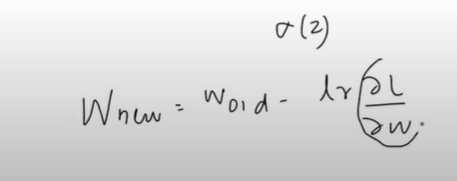

* formula for Calculation of bias

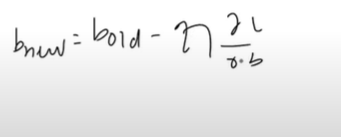

In [122]:
#create model

#define loop
#z = w*x+b

for epoch in range(epochs):
    #forward pass
    y_pred = model(X_train_tensor)
    #loss calculation
    loss = loss_function(y_pred, Y_train_tensor.view(-1,1))

    #backward pass
    loss.backward()
    #parameters update
    # we need to turn of gradient tracking for it so we will use no_grad()
    with torch.no_grad():
        # model.weigths-= learning_rate * model.weigths.grad
        # model.bias -= learning_rate * model.bias.grad
        model.linear.weight-= learning_rate * model.linear.weight.grad
        model.linear.bias -= learning_rate * model.linear.bias.grad
    
    # zero gradients
    model.linear.weight.grad.zero_()
    model.linear.bias.grad.zero_()
    #printing loss in epochs
    print(f'Epoch: {epoch+1}, Loss:{loss.item()}')

Epoch: 1, Loss:0.10333245247602463
Epoch: 2, Loss:0.1030338928103447
Epoch: 3, Loss:0.10273966193199158
Epoch: 4, Loss:0.1024496927857399
Epoch: 5, Loss:0.10216382890939713
Epoch: 6, Loss:0.10188200324773788
Epoch: 7, Loss:0.10160412639379501
Epoch: 8, Loss:0.10133007913827896
Epoch: 9, Loss:0.10105980187654495
Epoch: 10, Loss:0.10079319775104523
Epoch: 11, Loss:0.10053016990423203
Epoch: 12, Loss:0.10027065873146057
Epoch: 13, Loss:0.1000145822763443
Epoch: 14, Loss:0.09976185113191605
Epoch: 15, Loss:0.09951242059469223
Epoch: 16, Loss:0.0992661863565445
Epoch: 17, Loss:0.09902308881282806
Epoch: 18, Loss:0.09878306835889816
Epoch: 19, Loss:0.09854606539011002
Epoch: 20, Loss:0.09831199049949646
Epoch: 21, Loss:0.09808081388473511
Epoch: 22, Loss:0.09785247594118118
Epoch: 23, Loss:0.09762689471244812
Epoch: 24, Loss:0.09740401059389114
Epoch: 25, Loss:0.09718381613492966


### Torch optime module
* builtin optimizer 

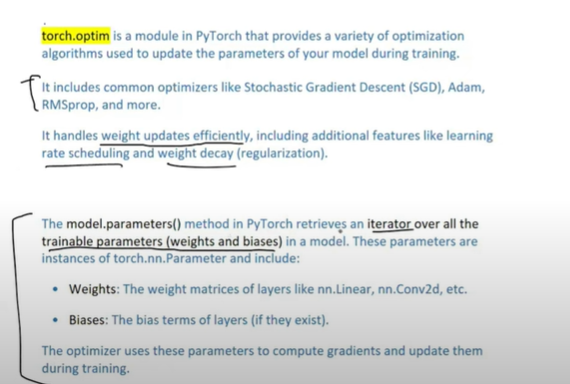

In [ ]:
#create model

#define loop
#z = w*x+b
# using optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_function = nn.BCELoss()
for epoch in range(epochs):
    #forward pass
    y_pred = model(X_train_tensor)
    #loss calculation
    loss = loss_function(y_pred, Y_train_tensor.view(-1,1))
    
    #setting optimizer manually zero
    optimizer.zero_grad()
    #backward pass
    loss.backward()
    #parameters update
    # we need to turn of gradient tracking for it so we will use no_grad()
    # with torch.no_grad():
    #     # model.weigths-= learning_rate * model.weigths.grad
    #     # model.bias -= learning_rate * model.bias.grad
    #     model.linear.weight-= learning_rate * model.linear.weight.grad
    #     model.linear.bias -= learning_rate * model.linear.bias.grad
    
    #parameters update
    optimizer.step()

    # # zero gradients
    # model.linear.weight.grad.zero_()
    # model.linear.bias.grad.zero_()

    #printing loss in epochs
    print(f'Epoch: {epoch+1}, Loss:{loss.item()}')

c:\Users\Shahz\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch: 1, Loss:0.5780673623085022
Epoch: 2, Loss:0.4694661796092987
Epoch: 3, Loss:0.40662822127342224
Epoch: 4, Loss:0.3647412955760956
Epoch: 5, Loss:0.33430683612823486
Epoch: 6, Loss:0.3109080493450165
Epoch: 7, Loss:0.2921869158744812
Epoch: 8, Loss:0.2767578065395355
Epoch: 9, Loss:0.26374760270118713
Epoch: 10, Loss:0.25257623195648193
Epoch: 11, Loss:0.24284137785434723
Epoch: 12, Loss:0.23425474762916565
Epoch: 13, Loss:0.22660347819328308
Epoch: 14, Loss:0.2197268307209015
Epoch: 15, Loss:0.2135007232427597
Epoch: 16, Loss:0.20782777667045593
Epoch: 17, Loss:0.2026302069425583
Epoch: 18, Loss:0.1978452205657959
Epoch: 19, Loss:0.19342128932476044
Epoch: 20, Loss:0.18931569159030914
Epoch: 21, Loss:0.18549278378486633
Epoch: 22, Loss:0.1819222867488861
Epoch: 23, Loss:0.17857852578163147
Epoch: 24, Loss:0.17543934285640717
Epoch: 25, Loss:0.17248563468456268


In [127]:
model.linear.weight

Parameter containing:
tensor([[ 0.2856,  0.2372,  0.2344,  0.3199,  0.1573,  0.2227,  0.0969,  0.3564,
          0.1127, -0.1690,  0.3188, -0.1456,  0.0594,  0.0578, -0.0934,  0.1739,
         -0.0057,  0.1677, -0.1286,  0.0932,  0.3626,  0.3002,  0.3138,  0.0635,
          0.3005,  0.1858,  0.0477,  0.0562,  0.1963, -0.0835]],
       requires_grad=True)

In [128]:
model.linear.bias

Parameter containing:
tensor([-0.0831], requires_grad=True)

In [129]:
with torch.no_grad():
    y_pred = model.forward(X_test_tensor)
    y_pred = (y_pred>=0.5).float()
    accuracy = (y_pred == Y_test_tensor).float().mean()
    print(f'Accuracy: {accuracy.item()}' )



Accuracy: 0.5332409739494324


In [83]:
y_pred

tensor([[1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
      